In [1]:
from pathlib import Path
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from collections import defaultdict



### **1. Validate Influence Scores with Visual Analysis**
Since this dataset contains images, you can:
- **Visualize the Top-Influence Samples:**
  - Show examples of the top-ranked samples (both positive and negative influence scores).
  - **Hypothesis**: Do the top-ranked samples have clear features that distinguish healthy and unhealthy images? For example:
    - High-influence unhealthy samples might have distinct pathology patterns (e.g., **lesions** or **hemorrhages**).
    - High-influence healthy samples might represent "typical" healthy patterns.
  
- **Analyze Misclassified or Ambiguous Cases:**
  - Investigate if samples with medium or conflicting influence scores are visually ambiguous (e.g., borderline cases or low-quality images).

- Loading images and their labels

In [53]:
root_dir = './'

img_dir = os.path.join(root_dir, 'images', '42_200_200')

h_img = np.load(os.path.join(img_dir, 'healthy_images.npy'))

h_l = np.load(os.path.join(img_dir, 'healthy_labels.npy'))

unh_img = np.load(os.path.join(img_dir, 'unhealthy_images.npy'))

unh_l = np.load(os.path.join(img_dir, 'unhealthy_labels.npy'))

total_imgs = np.concatenate([h_img, unh_img])

print(total_imgs.shape)

total_label = np.concatenate([h_l, unh_l])

print(total_label.shape)

(384, 3, 224, 224)
(384,)


In [55]:
def channel_last(img):
    
    img_p = img.transpose(1,2,0)
    
    mean = np.array([0.485, 0.456, 0.406])  # ImageNet mean for RGB channels
    std = np.array([0.229, 0.224, 0.225])
    img_tr_np_sc = img_p * std + mean
    img_f = np.clip(img_tr_np_sc, 0, 1) * 255.0
    img_f = img_f.astype(np.uint8)
    return img_f

In [6]:
most_77_importnat_imgs = [channel_last(total_imgs[i]) for i in df_ranked_scores['ids'][:77]]

print(len(most_77_importnat_imgs))

77


In [5]:
path_inf_score = Path('./infscores/42_2_simclr_400')

df_path = os.path.join(path_inf_score, 'df_rank.csv')

df_ranked_scores = pd.read_csv(df_path)

In [11]:
df_ranked_scores

ids    scores
0    249  0.079484
1    231  0.069545
2    371  0.057572
3    377  0.052780
4     64  0.048426
..   ...       ...
379  356 -0.052484
380  197 -0.053322
381  233 -0.055105
382  108 -0.056457
383  129 -0.062187

[384 rows x 2 columns]

- We can compute number of images corresponding to different percentage of influence scores as follows:

  - percent in [0.2,0.5,1,2,3,4,5,6,7,8, 9 , 10]:
    
    print(int(np.ceil((percent / 100) * 384)))

In [7]:
dic_num = defaultdict()

for percent in [0.2,0.5,1,2,3,4,5,6,7,8, 9 , 10,11,12,13,14,15,16,17,18,19,20]:
    
    num = int(np.ceil((percent / 100) * 384))
    
    dic_num[percent] = num

In [8]:
print(dic_num)

defaultdict(None, {0.2: 1, 0.5: 2, 1: 4, 2: 8, 3: 12, 4: 16, 5: 20, 6: 24, 7: 27, 8: 31, 9: 35, 10: 39, 11: 43, 12: 47, 13: 50, 14: 54, 15: 58, 16: 62, 17: 66, 18: 70, 19: 73, 20: 77})


In [9]:
print(df_ranked_scores.iloc[77]['scores'])

0.0222785943033159


In [10]:
most_77_important_scores = df_ranked_scores['scores'][:77].values
most_77_important_labels = [total_label[i] for i in df_ranked_scores['ids'][:77]]


print(len(most_77_important_scores))

print(len(most_77_important_labels))

77
77


In [11]:
most_77_important_ids = df_ranked_scores['ids'][:77].values

print(len(most_77_important_ids))

77


In [15]:
most_77_important_unhealthy_imgs= []
most_77_important_unhealthy_labels = []
most_77_important_unhealthy_scores = []

most_77_important_healthy_imgs= []
most_77_important_healthy_labels = []
most_77_important_healthy_scores = []

class_unh = class1_id+class2_id+class3_id+class4_id

for i in range(77):
    if most_77_important_ids[i] in class_unh:
        most_77_important_unhealthy_imgs.append(most_77_importnat_imgs[i])
        most_77_important_unhealthy_labels.append(most_77_important_labels[i])
        most_77_important_unhealthy_scores.append(most_77_important_scores[i])
    else:
        most_77_important_healthy_imgs.append(most_77_importnat_imgs[i])
        most_77_important_healthy_labels.append(most_77_important_labels[i])
        most_77_important_healthy_scores.append(most_77_important_scores[i])
        
        

In [62]:
print(len(most_77_important_unhealthy_imgs))
print(len(most_77_important_unhealthy_labels))
print(len(most_77_important_unhealthy_scores))

print(len(most_77_important_healthy_imgs))
print(len(most_77_important_healthy_labels))
print(len(most_77_important_healthy_scores))

18
18
18
59
59
59


In [46]:
print(f'class0_id:{class0_id}\n')

print(f'class1_id:{class1_id}\n')

print(f'class2_id:{class2_id}\n')

print(f'class3_id:{class3_id}\n')

print(f'class4_id:{class4_id}')

class0_id:[64, 143, 68, 128, 123, 36, 59, 161, 114, 138, 98, 101, 15, 152, 23, 190, 10, 191, 35, 20, 29, 58, 149, 32, 27, 121, 86, 104, 159, 88, 84, 62, 73, 158, 102, 89, 186, 11, 177, 139, 92, 75, 76, 188, 131, 136, 167, 34, 148, 85, 44, 182, 43, 180, 156, 37, 47, 19, 112]

class1_id:[308]

class2_id:[249, 231, 254, 223, 213, 257, 259, 262, 269, 211]

class3_id:[371, 375, 369, 365]

class4_id:[377, 382, 383]


In [52]:
class0_id = [most_77_important_ids[i] for i in range(len(most_77_important_scores)) if most_77_important_labels[i]==0]

class1_id = [most_77_important_ids[i] for i in range(len(most_77_important_scores)) if most_77_important_labels[i]==1]

class2_id = [most_77_important_ids[i] for i in range(len(most_77_important_scores)) if most_77_important_labels[i]==2]

class3_id = [most_77_important_ids[i] for i in range(len(most_77_important_scores)) if most_77_important_labels[i]==3]

class4_id = [most_77_important_ids[i] for i in range(len(most_77_important_scores)) if most_77_important_labels[i]==4]

In [50]:
class0 = [most_77_important_scores[i] for i in range(len(most_77_important_scores)) if most_77_important_labels[i]==0]

class1 = [most_77_important_scores[i] for i in range(len(most_77_important_scores)) if most_77_important_labels[i]==1]

class2 = [most_77_important_scores[i] for i in range(len(most_77_important_scores)) if most_77_important_labels[i]==2]

class3 = [most_77_important_scores[i] for i in range(len(most_77_important_scores)) if most_77_important_labels[i]==3]

class4 = [most_77_important_scores[i] for i in range(len(most_77_important_scores)) if most_77_important_labels[i]==4]

In [51]:
print(len(class0))

print(len(class1))

print(len(class2))

print(len(class3))

print(len(class4))

59
1
10
4
3


## Visualaising unhealthy images included in top 20% high influence score

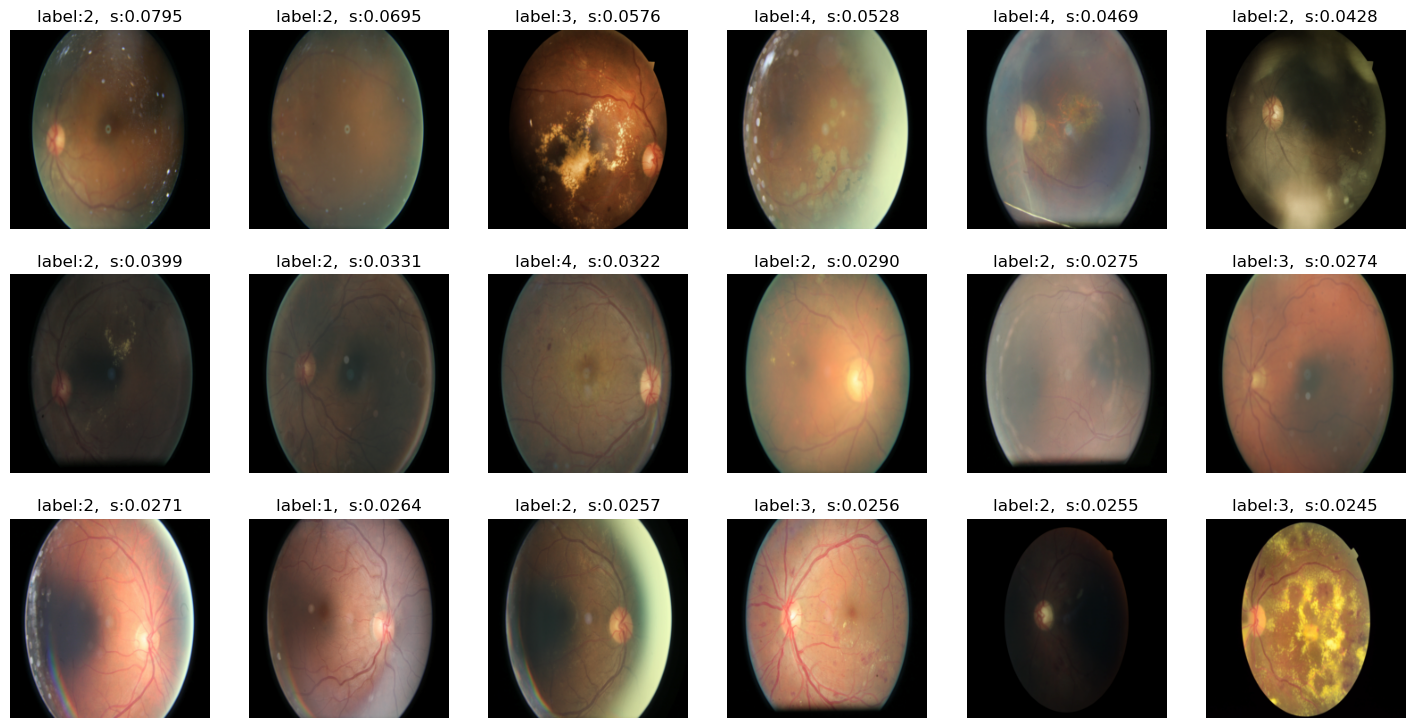

In [66]:
fig, axes = plt.subplots(3, 6, figsize=(18,9))

for i in range(3):    
    for j in range(6):
        index = i * 6 + j  # Calculate the index for images
        axes[i, j].imshow(most_77_important_unhealthy_imgs[index])  # Display image
        axes[i,j].set_title(f'label:{most_77_important_unhealthy_labels[index]},  s:{most_77_important_unhealthy_scores[index]:0.4f}')
        axes[i, j].axis('off')  # Hide axis

# Visualaising healthy images included in top 20% high influence score

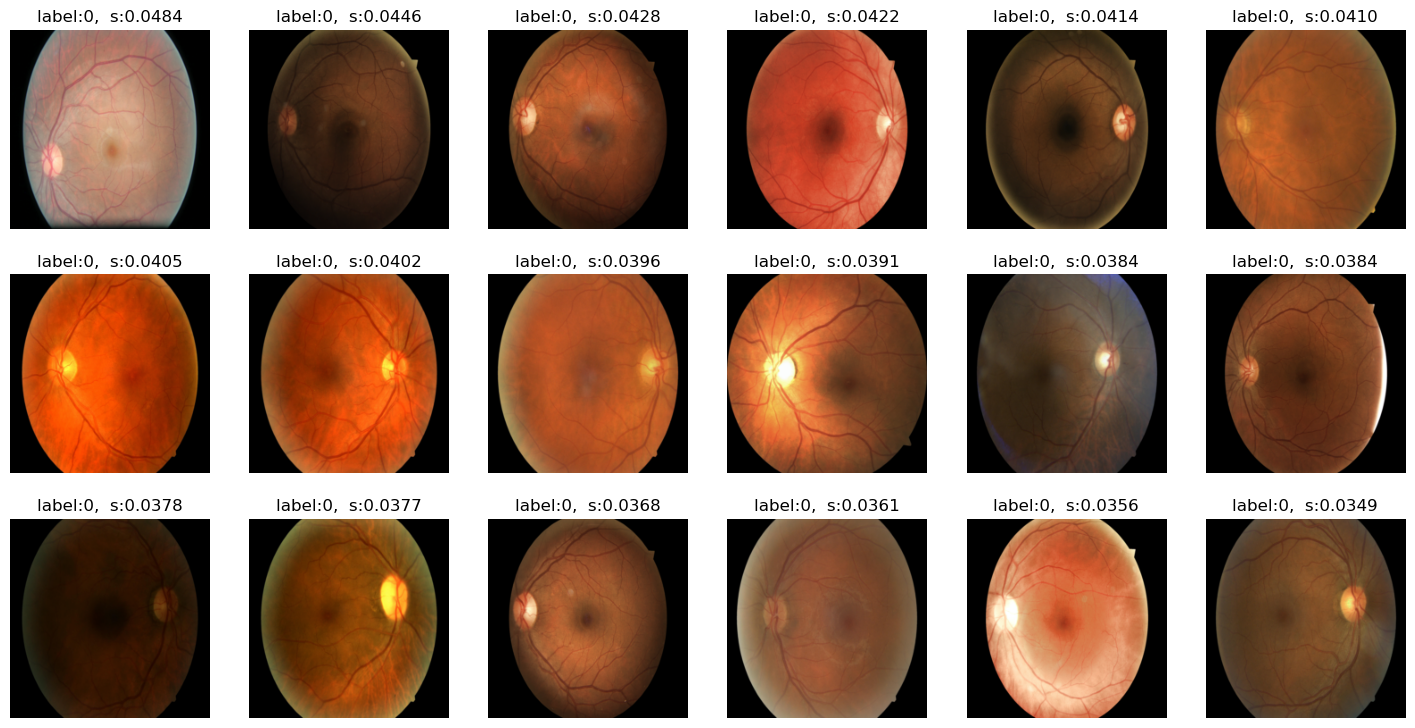

In [65]:
fig, axes = plt.subplots(3, 6, figsize=(18,9))

for i in range(3):    
    for j in range(6):
        index = i * 6 + j  # Calculate the index for images
        axes[i, j].imshow(most_77_important_healthy_imgs[index])  # Display image
        axes[i,j].set_title(f'label:{most_77_important_healthy_labels[index]},  s:{most_77_important_healthy_scores[index]:0.4f}')
        axes[i, j].axis('off')  # Hide axis

- **Analysing influence scores based on sevearity level**:

  - Check if samples from more severe cases (e.g., advanced diabetic retinopathy) tend to have higher influence scores.
  - Hypothesis: Severe cases are more likely to drive differences between groups.

### **1. Validate Influence Scores with Visual Analysis**
- **Visualize the Top-Influence Samples:**
  - Show examples of the top-ranked samples (both positive and negative influence scores).
  - Hypothesis: Do the top-ranked samples have clear features that distinguish healthy and unhealthy images? For example:
    - High-influence unhealthy samples might have distinct pathology patterns (e.g., **lesions** or **hemorrhages**).
    - High-influence healthy samples might represent "typical" healthy patterns.
  
- **Analyze Misclassified or Ambiguous Cases:**
  - Investigate if samples with medium or conflicting influence scores are visually ambiguous (e.g., borderline cases or low-quality images).

## Visualaising unhealthy images included in top 20% low influence scores

In [16]:
df_ranked_scores

ids    scores
0    249  0.079484
1    231  0.069545
2    371  0.057572
3    377  0.052780
4     64  0.048426
..   ...       ...
379  356 -0.052484
380  197 -0.053322
381  233 -0.055105
382  108 -0.056457
383  129 -0.062187

[384 rows x 2 columns]

In [17]:
len(total_label)

384

In [30]:
ids = df_ranked_scores['ids']

In [31]:
print(type(ids))

<class 'pandas.core.series.Series'>


In [23]:
dic_labels = defaultdict(list)

for i in df_ranked_scores['ids'].values :
    
    dic_labels[i].append(total_label[i])
    
    if total_label[i] != 0:
        dic_labels[i].append('unh')
    else:
        dic_labels[i].append('h')
        

In [27]:
labels_cat = dic_labels.values

In [32]:
ranked_labels = [dic_labels[i][0] for i in ids]

In [34]:
ranked_cats = [dic_labels[i][1] for i in ids]

In [36]:
df_ranked_scores['labels'] = ranked_labels

In [37]:
df_ranked_scores.head()

ids    scores  labels
0  249  0.079484       2
1  231  0.069545       2
2  371  0.057572       3
3  377  0.052780       4
4   64  0.048426       0

In [38]:
df_ranked_scores['gr'] = ranked_cats 

In [39]:
df_ranked_scores.head()

ids    scores  labels   gr
0  249  0.079484       2  unh
1  231  0.069545       2  unh
2  371  0.057572       3  unh
3  377  0.052780       4  unh
4   64  0.048426       0    h

In [ ]:
path_inf_score = Path('./infscores/42_2_simclr_400')

In [40]:
csv_file = path_inf_score / "df_rank_label.csv"

In [41]:
df_ranked_scores.to_csv(csv_file, index=False)

- I asved the labels along with ranks in the following path:

  - `./infscores/42_2_simclr_400/df_rank_label.csv`
  
  - This dataframe has both labels, and groups of images 

In [70]:
df_ranked_scores[-77:]

ids    scores  labels   gr
307  256 -0.021877       2  unh
308  345 -0.021996       1  unh
309  260 -0.022014       2  unh
310  227 -0.022767       2  unh
311  196 -0.023026       2  unh
..   ...       ...     ...  ...
379  356 -0.052484       1  unh
380  197 -0.053322       2  unh
381  233 -0.055105       2  unh
382  108 -0.056457       0    h
383  129 -0.062187       0    h

[77 rows x 4 columns]

In [ ]:
most_77_important_scores = df_ranked_scores['scores'][:77].values
most_77_important_labels = [total_label[i] for i in df_ranked_scores['ids'][:77]]

In [71]:
print(list(range(384))[-77:])

[307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383]


In [83]:

least_77_important_imgs_h = [channel_last(total_imgs[i]) for i in df_ranked_scores['ids'][-77:] if df_ranked_scores['gr'][i]=='h' ]


least_77_important_imgs_unh = [channel_last(total_imgs[i]) for i in df_ranked_scores['ids'][-77:] if df_ranked_scores['gr'][i]=='unh' ]


least_77_important_ids = df_ranked_scores['ids'][:77].values

In [84]:
print(len(least_77_important_imgs_h))

25


In [85]:
print(len(least_77_important_imgs_unh))

52


In [86]:
least_77_important_labels = [total_label[i] for i in df_ranked_scores['ids'][-77:]]

In [88]:
print(len(least_77_important_labels))

77


In [80]:
least_77_important_labels_h = [df_ranked_scores['labels'][i] for i in list(range(384))[-77:] if df_ranked_scores['gr'][i]=='h' ]

least_77_important_labels_unh = [df_ranked_scores['labels'][i] for i in list(range(384))[-77:] if df_ranked_scores['gr'][i]=='unh' ] 

In [81]:
print(len(least_77_important_labels_h))

print(len(least_77_important_labels_unh))

8
69


In [75]:
least_77_important_scores_h = [df_ranked_scores['scores'][i] for i in list(range(384))[-77:] if df_ranked_scores['gr'][i]=='h' ]

least_77_important_scores_unh = [df_ranked_scores['scores'][i] for i in list(range(384))[-77:] if df_ranked_scores['gr'][i]=='unh' ]

In [82]:
print(len(least_77_important_scores_h))

print(len(least_77_important_scores_unh))

8
69


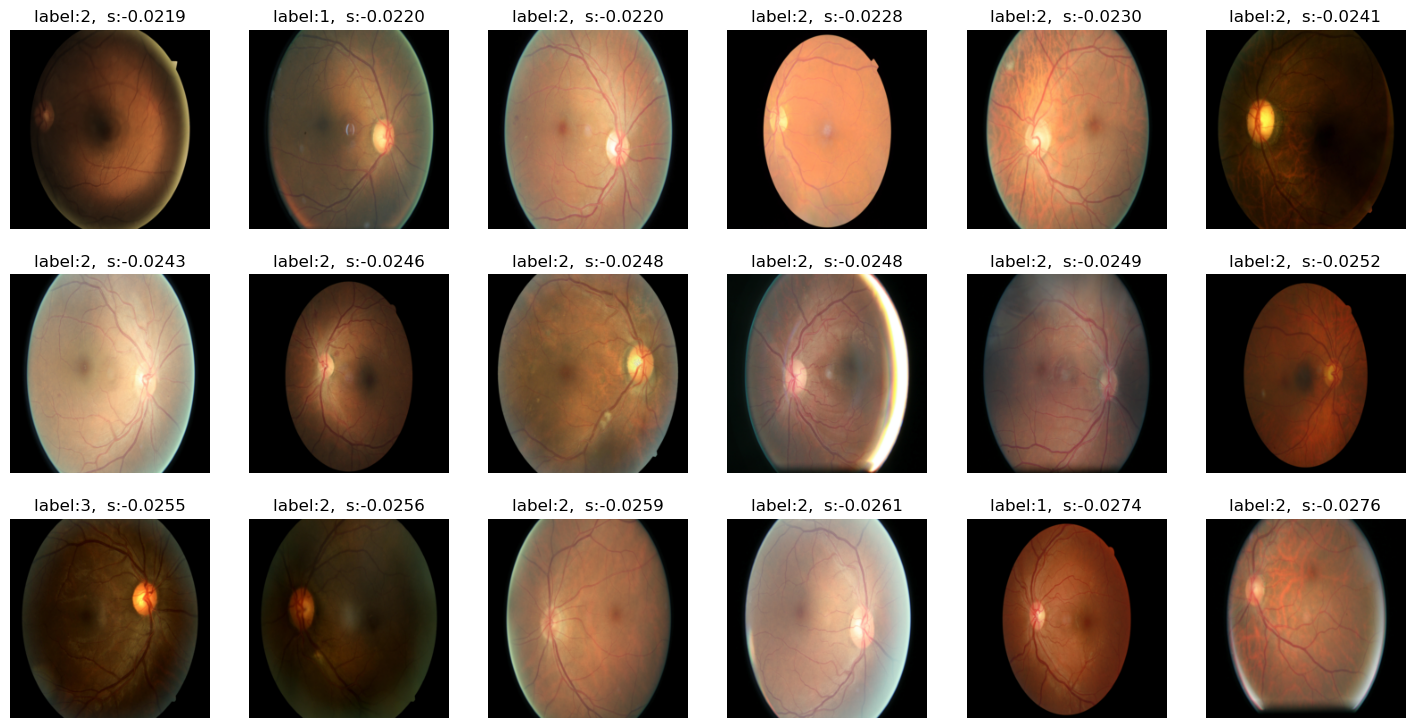

In [76]:
fig, axes = plt.subplots(3, 6, figsize=(18,9))

for i in range(3):    
    for j in range(6):
        index = i * 6 + j  # Calculate the index for images
        axes[i, j].imshow(least_77_important_imgs_unh[index])  # Display image
        axes[i,j].set_title(f'label:{least_77_important_labels_unh[index]},  s:{least_77_important_scores_unh[index]:0.4f}')
        axes[i, j].axis('off')  # Hide axis

IndexError: list index out of range

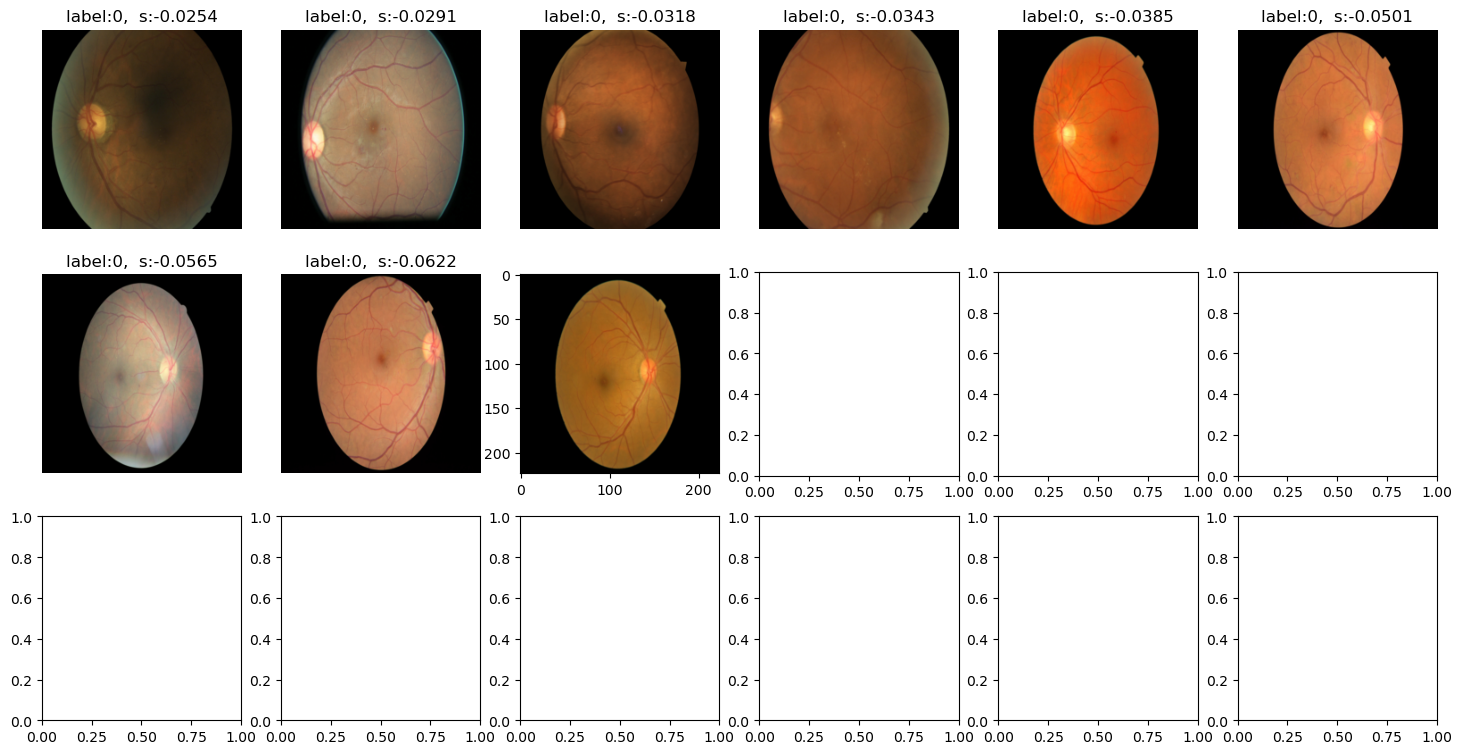

In [77]:
fig, axes = plt.subplots(3, 6, figsize=(18,9))

for i in range(3):    
    for j in range(6):
        index = i * 6 + j  # Calculate the index for images
        axes[i, j].imshow(least_77_important_imgs_h[index])  # Display image
        axes[i,j].set_title(f'label:{least_77_important_labels_h[index]},  s:{least_77_important_scores_h[index]:0.4f}')
        axes[i, j].axis('off')  # Hide axis

## 4- Severity-Based Analysis

 - If metadata on disease severity is available:

- **Correlate Influence Scores with Severity**:

  - Check if samples from more severe cases (e.g., advanced diabetic retinopathy) tend to have higher influence scores.

  - Hypothesis: **Severe cases** are more likely to drive **differences** between groups.

- **Group-Specific Influence Scores**:

  - Separate unhealthy samples into **severity levels** and recompute influence scores for each subset.
  
  - Hypothesis: Samples from **mild cases** might have **lower influence scores**, while advanced cases should dominate.

- First, we plot influese scores across individual levels, for each severity level:

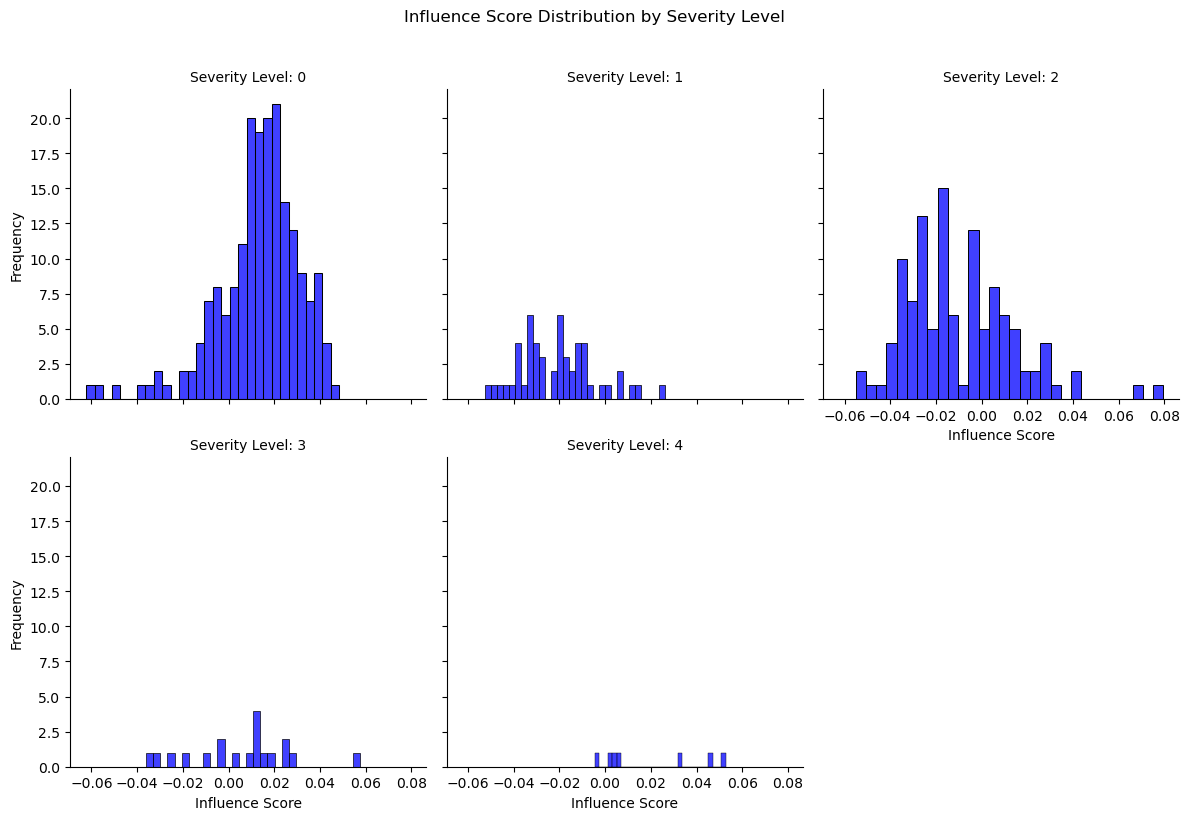

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for Influence Score by Severity Level
g = sns.FacetGrid(df_ranked_scores, col="labels", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "scores", bins=30, kde=False, color="blue")

# Add titles and labels
g.set_titles("Severity Level: {col_name}")
g.set_axis_labels("Influence Score", "Frequency")
plt.suptitle("Influence Score Distribution by Severity Level", y=1.02)
plt.tight_layout()
plt.show()


## Looking at more visualisation of influence scores based on severity level

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import os

In [6]:
path_inf_score = Path('./infscores/42_2_simclr_400')

df_path = os.path.join(path_inf_score, 'df_rank.csv')

In [7]:
df = pd.read_csv(df_path)

In [8]:
df_pos = df[df['scores']>0]

In [9]:
len(df_pos)

214

In [10]:
df_neg = df[df['scores']<0]

In [11]:
len(df_neg)

170

In [12]:
(214*100) /384

55.729166666666664

- This shows the number of samples with positive influnece scores

In [3]:
base_path = "/dhc/home/masoumeh.javanbakhat/netstore-old/Baysian/3D/Explainability/Retina_Codes"
root_dir = Path(base_path)
inf_dir = root_dir / 'infscores'


In [4]:
seed = 42

pre_exp = 2

model='simclr'



In [5]:
file_path = os.path.join(inf_dir, f'{seed}_{pre_exp}_{model}_400')
df_path = os.path.join(file_path,'df_p_most_49.csv')

In [6]:
df_p_most = pd.read_csv(df_path)

In [7]:
df_p_most[:20]

1         2         3         4         5         6         7  \
0  0.012987  0.031968  0.068931  0.117882  0.165834  0.195804  0.256743   

         8         9        10  ...        40        41        42        43  \
0  0.28971  0.342657  0.364635  ...  0.001998  0.000999  0.000999  0.000999   

         44        45        46        47        48        49  
0  0.000999  0.000999  0.000999  0.000999  0.000999  0.000999  

[1 rows x 49 columns]

In [15]:
x = df_p_most.columns

y = df_p_most.iloc[0]

In [16]:
print(len(x))

print(len(y))

49
49


In [17]:
x_10 = x[:10]

y_10 = y[:10]

print(x_10.shape)

print(y_10.shape)

(10,)
(10,)


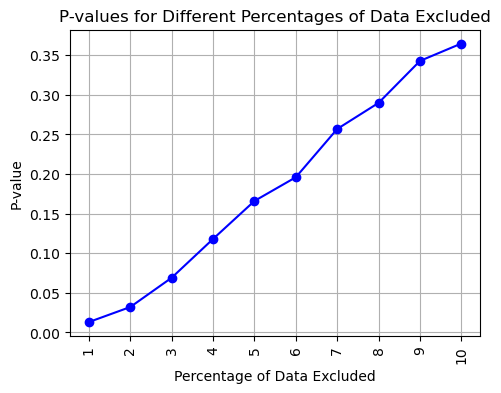

In [20]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(5, 4))  # Set the figure size
plt.plot(x_10, y_10, marker='o', linestyle='-', color='b')  # Plot with markers and a line
plt.title("P-values for Different Percentages of Data Excluded")  # Title
plt.xlabel("Percentage of Data Excluded")  # x-axis label
plt.ylabel("P-value")  # y-axis label
plt.grid(True)  # Show grid
plt.xticks(x_10)  # Ensure all percentage values appear on the x-axis
plt.tight_layout()  # Adjust layout to prevent overlap
plt.xticks(rotation=90)
# Show the plot
plt.show()

In [30]:
df_path_least = os.path.join(file_path,'df_p_least_49.csv')

In [31]:
df_p_least = pd.read_csv(df_path_least)

In [32]:
df_p_least

1         2         3         4         5         6         7  \
0  0.001998  0.000999  0.000999  0.000999  0.000999  0.000999  0.000999   

          8         9        10  ...        40        41        42        43  \
0  0.000999  0.000999  0.000999  ...  0.000999  0.000999  0.000999  0.000999   

         44        45        46        47        48        49  
0  0.000999  0.000999  0.000999  0.000999  0.000999  0.000999  

[1 rows x 49 columns]

In [34]:
x = df_p_most.columns

y = df_p_most.iloc[0]

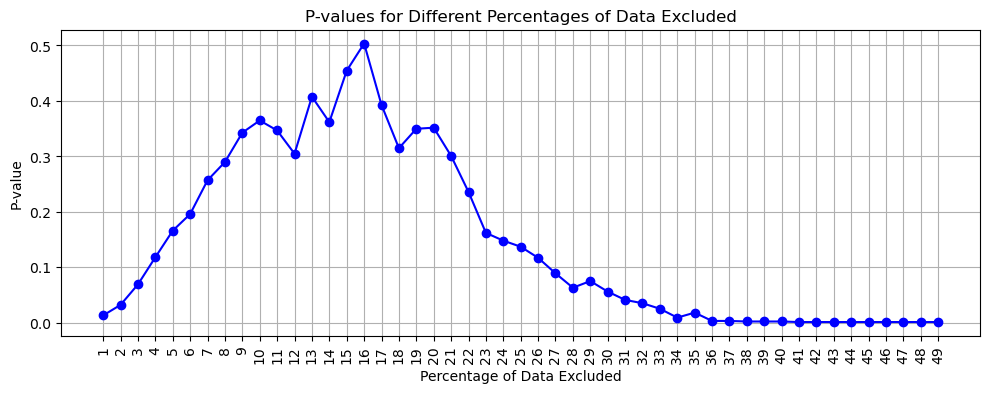

In [37]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 4))  # Set the figure size
plt.plot(x, y, marker='o', linestyle='-', color='b')  # Plot with markers and a line
plt.title("P-values for Different Percentages of Data Excluded")  # Title
plt.xlabel("Percentage of Data Excluded")  # x-axis label
plt.ylabel("P-value")  # y-axis label
plt.grid(True)  # Show grid
plt.xticks(x)  # Ensure all percentage values appear on the x-axis
plt.tight_layout()  # Adjust layout to prevent overlap
plt.xticks(rotation=90)
# Show the plot
plt.show()

In [44]:
(16* 384)/100

61.44

In [43]:
df

ids    scores
0    249  0.079484
1    231  0.069545
2    371  0.057572
3    377  0.052780
4     64  0.048426
..   ...       ...
379  356 -0.052484
380  197 -0.053322
381  233 -0.055105
382  108 -0.056457
383  129 -0.062187

[384 rows x 2 columns]

In [45]:
df[:70]

ids    scores
0   249  0.079484
1   231  0.069545
2   371  0.057572
3   377  0.052780
4    64  0.048426
..  ...       ...
65  148  0.024619
66  365  0.024503
67   85  0.024102
68   44  0.023793
69  182  0.023667

[70 rows x 2 columns]

In [1]:
from pathlib import Path
import os
import numpy as np
import pandas as pd

In [2]:
path_inf_score = Path('./infscores/42_2_simclr_400')

In [3]:
csv_file = path_inf_score / "df_rank_label.csv"

In [ ]:
df = pd.read_csv(csv_file)

In [8]:
df


ids    scores  labels   gr
0    249  0.079484       2  unh
1    231  0.069545       2  unh
2    371  0.057572       3  unh
3    377  0.052780       4  unh
4     64  0.048426       0    h
..   ...       ...     ...  ...
379  356 -0.052484       1  unh
380  197 -0.053322       2  unh
381  233 -0.055105       2  unh
382  108 -0.056457       0    h
383  129 -0.062187       0    h

[384 rows x 4 columns]

In [119]:
df.max()

ids            383
scores    0.079484
labels           4
gr             unh
dtype: object

In [121]:
df.min()

ids              0
scores   -0.062187
labels           0
gr               h
dtype: object

In [9]:
df['labels'].unique()

array([2, 3, 4, 0, 1])

In [10]:
df_cls0 = df[df['labels']==0]

print(len(df_cls0))

192


In [11]:
df_cls1 = df[df['labels']==1]

In [12]:
print(len(df_cls1))

52


In [13]:
df_cls2 = df[df['labels']==2]

print(len(df_cls2))

114


In [14]:
df_cls3= df[df['labels']==3]

print(len(df_cls3))

19


In [15]:
df_cls4 = df[df['labels']==4]

print(len(df_cls4))

7


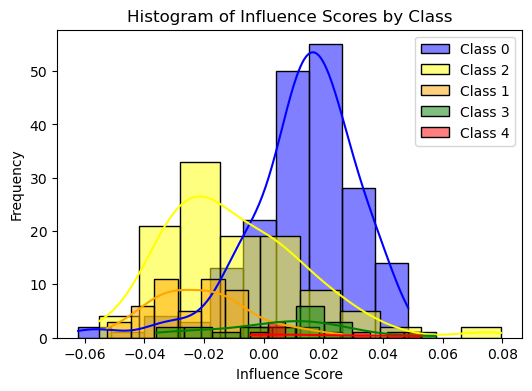

In [18]:
import seaborn as sns

# Visualization: Histograms
plt.figure(figsize=(6, 4))
sns.histplot(df_cls0['scores'], label="Class 0", kde=True, color="blue", bins=10)
sns.histplot(df_cls2['scores'], label="Class 2", kde=True, color="yellow", bins=10)
sns.histplot(df_cls1['scores'], label="Class 1", kde=True, color="orange", bins=10)
sns.histplot(df_cls3['scores'], label="Class 3", kde=True, color="green", bins=10)
sns.histplot(df_cls4['scores'], label="Class 4", kde=True, color="red", bins=10)
plt.title("Histogram of Influence Scores by Class")
plt.xlabel("Influence Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

- What to Look For:
   - Do the scores grow in magnitude (positive or negative) as severity increases (from 0 to 4)?
   - Are certain severity levels driving the difference (e.g., Severity 4 with high positive scores)?
   - Does Severity 0 (healthy) cluster around zero influence, suggesting they are less influential?

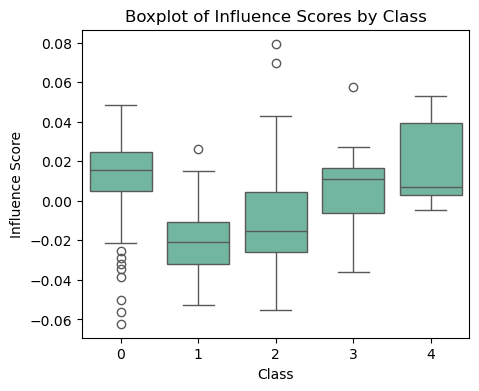

In [49]:
plt.figure(figsize=(5, 4))
sns.boxplot(x="labels", y="scores", data=df_cls0,hue="labels", palette="Set2",legend=False)
sns.boxplot(x="labels", y="scores", data=df_cls1,hue="labels", palette="Set2",legend=False)
sns.boxplot(x="labels", y="scores", data=df_cls2,hue="labels", palette="Set2",legend=False)
sns.boxplot(x="labels", y="scores", data=df_cls3,hue="labels", palette="Set2",legend=False)
sns.boxplot(x="labels", y="scores", data=df_cls4,hue="labels", palette="Set2",legend=False)
plt.title("Boxplot of Influence Scores by Class")
plt.xlabel("Class")
plt.ylabel("Influence Score")
plt.show()

- What to Look For:
   - Does the median influence score increase with severity?
   - Do severe cases (e.g., levels 3 and 4) have larger spreads or outliers in influence scores, indicating their dominant role in group separation?

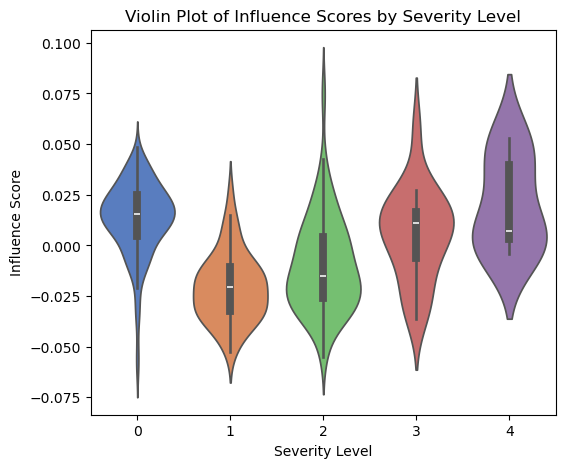

In [51]:
plt.figure(figsize=(6,5))

sns.violinplot(data=df, x='labels', y='scores',hue="labels", palette='muted',legend=False)
plt.title('Violin Plot of Influence Scores by Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Influence Score')
plt.show()

- **For unhealthy group**:

    - Influence scores appear to increase as **severity levels** increase
    
    - Severity 2 and 3: Show a shift closer to zero, with more balanced distributions of positive and negative influence scores.
    
    - Severity 4: Shows the highest median influence score, with most samples exhibiting positive influence. This suggests that the samples in this group are contributing strongly to the differences between healthy and unhealthy groups.
    
- **Trends**:
    - There is a positive correlation between influence scores and severity levels, meaning that as the severity increases, the samples tend to have higher influence scores.
    - This aligns with the hypothesis that more severe cases are more likely to contribute to the difference between groups

- **Implications**:
 - The boxplot indicates that severity level 4 (most severe) dominates the unhealthy group’s contribution to the group difference.
 
 - Severity 1 stands out with negative influence scores, which might warrant further investigation to understand its unique characteristics.

In [105]:
df

ids    scores  labels   gr
3    377  0.052780       4  unh
5    382  0.046855       4  unh
31   383  0.032151       4  unh
179  379  0.006959       4  unh
195  380  0.004223       4  unh
209  381  0.001763       4  unh
233  378 -0.004438       4  unh

In [111]:
df['gr'].unique()

array(['unh', 'h'], dtype=object)

In [112]:
df_h = df[df['gr']=='h']

df_unh = df[df['gr']=='unh']

In [113]:
print(len(df_h))

print(len(df_unh))

192
192


In [114]:
df_grouped = df.groupby('gr')
df_h = df_grouped.get_group('h')
df_unh = df_grouped.get_group('unh')

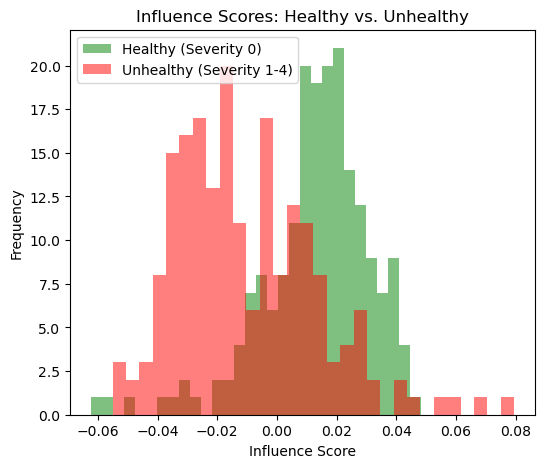

In [118]:
plt.figure(figsize=(6, 5))

# Healthy group
plt.hist(df_h['scores'], bins=30, alpha=0.5, label='Healthy (Severity 0)', color='green')

# Unhealthy group
plt.hist(df_unh['scores'], bins=30, alpha=0.5, label='Unhealthy (Severity 1-4)', color='red')

plt.title('Influence Scores: Healthy vs. Unhealthy')
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.show()

- What to Look For:
  - Do unhealthy samples dominate the distribution of high positive or negative influence scores?
  - Does the healthy group (Severity 0) cluster closer to zero, as they are expected to contribute less to group differences?

### Looking at corrolation between severity level and influnec scores

In [24]:
from scipy.stats import spearmanr

# Extract the relevant columns
severity = df['labels']
influence_score = df['scores']

# Calculate Spearman correlation
spearman_corr, spearman_p = spearmanr(severity, influence_score)

print(f"Spearman Correlation Coefficient: {spearman_corr:.3f}")
print(f"Spearman p-value: {spearman_p:.3f}")

Spearman Correlation Coefficient: -0.407
Spearman p-value: 0.000


In [25]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
pearson_corr, pearson_p = pearsonr(severity, influence_score)

print(f"Pearson Correlation Coefficient: {pearson_corr:.3f}")
print(f"Pearson p-value: {pearson_p:.3f}")

Pearson Correlation Coefficient: -0.300
Pearson p-value: 0.000


- **Interpreting Results**:

 - corrolation coefficient: Range:[-1,1]
  
  - Magnitude Interpretation:
    - 0.0 – 0.1: Virtually no correlation
    - 0.1 – 0.3: Small correlation
    - **0.3 – 0.5: Moderate correlation**
    - 0.5 – 1.0: Strong correlation
    
 - p-value:
 
    - Interpretation: Probability that the observed correlation occurred by chance.
    - Threshold: Typically, p < 0.05 is considered statistically significant.

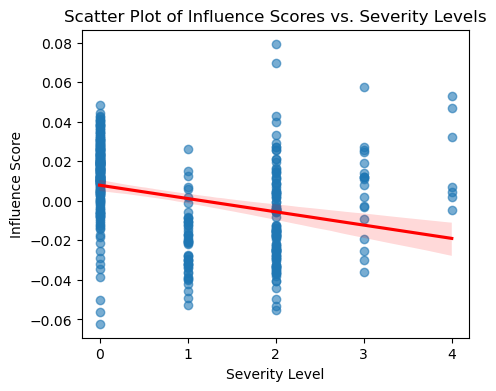

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.regplot(x='labels', y='scores', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Scatter Plot of Influence Scores vs. Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Influence Score')
plt.xticks([0,1,2,3,4])
plt.show()

- Let me consider only severity of unhealthy group:

In [32]:
df_unh = df[df['gr']=='unh']

df_h = df[df['gr']=='h']

In [33]:
print(len(df_unh))

print(len(df_h))

192
192


#### Looking at corrolation of severity levle of unhealthy group and influence scores

- Spearman corr: It's a non-linear non-parametric corrolation metric 

- Pearson corr: It's a linear 

In [34]:
from scipy.stats import spearmanr

# Extract the relevant columns
severity_unh = df_unh['labels']
influence_score_unh = df_unh['scores']

# Calculate Spearman correlation
spearman_corr_unh, spearman_p_unh = spearmanr(severity_unh, influence_score_unh)

print(f"Spearman Correlation Coefficient: {spearman_corr_unh:.3f}")
print(f"Spearman p-value: {spearman_p_unh:.3f}")

Spearman Correlation Coefficient: 0.367
Spearman p-value: 0.000


In [38]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
pearson_corr_unh, pearson_p_unh = pearsonr(severity_unh, influence_score_unh)

print(f"Pearson Correlation Coefficient: {pearson_corr_unh:.3f}")
print(f"Pearson p-value: {pearson_p_unh:.3f}")

Pearson Correlation Coefficient: 0.394
Pearson p-value: 0.000


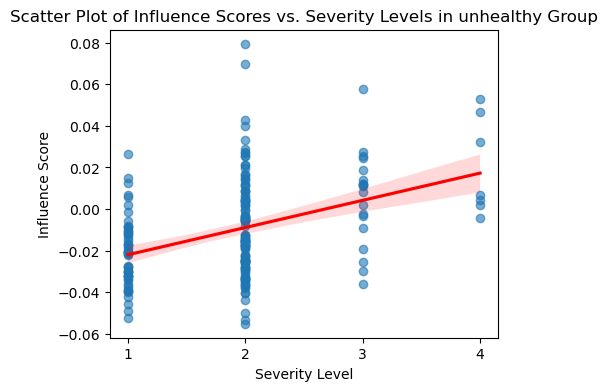

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.regplot(x='labels', y='scores', data=df_unh, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Scatter Plot of Influence Scores vs. Severity Levels in unhealthy Group')
plt.xlabel('Severity Level')
plt.ylabel('Influence Score')
plt.xticks([1,2,3,4])
plt.show()


In [56]:
#plt.figure(figsize=(4, 4))
#sns.jointplot(data=df_unh, x='labels', y='scores', kind='reg', height=8)
#plt.show()

- The above plot indicates that there is a positive corrolation between severity level and influnce score.

- Above **Plots** indicate that there is a **positive** and **statistically significant** corrolation between **severity level** and **influence scores**. 

Compare the influence score distributions within the unhealthy group across mild and severe cases (e.g., severity 1 vs. 4). This could be done with a paired t-test or ANOVA.

## Statistical tests on influnece scores

- For performing **Statistical Tests** over **Influnece Scores**, we do a statistical test based on normality of influnece scores.

- For that, we assess the normality of influence scores based on the histogram, QQ-plot. 

- Then, if scores are normally distributed, consider parametric tests like **ANOVA**. If not, use non-parametric tests like **Kruskal-Wallis**.


- **Null Hypothesis**: There is no difference in **influence scores** between **severity groups**.

- **Alternative Hypothesis**: At least **one severity group** has a **significantly different distribution** of influence scores.

- I do not think that influence scores are normally distributed accross **severity levels**.

- But I do the following tests to see if they are normally distributed or not. 

- I use QQ-plot for each severity group and also the following statistical-test which is knows as Shapiro-Wilk Test.

In [ ]:
# Q-Q plot for each severity group
for severity in range(5):
    stats.probplot(influence_scores[severity], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for Severity {severity}")
    plt.show()

In [61]:
import scipy.stats as stats
# Performing Shapiro-Wilk Test for normality
for df in [df_cls0,df_cls1, df_cls2, df_cls3, df_cls4]:
    stat, p_value = stats.shapiro(df['scores'])
    print(f'- Shapiro-Wilk Test p-value: {p_value}')

- Shapiro-Wilk Test p-value: 1.6943318000171288e-07
- Shapiro-Wilk Test p-value: 0.29423166158767733
- Shapiro-Wilk Test p-value: 0.00038934566710878963
- Shapiro-Wilk Test p-value: 0.5898862169380789
- Shapiro-Wilk Test p-value: 0.1563797186440017


- For **class 0** and **class 2**, influnece scores are **not normal (p-val < 0.05)**, but for class 1, class 4, class 5 data are normally distributed. 

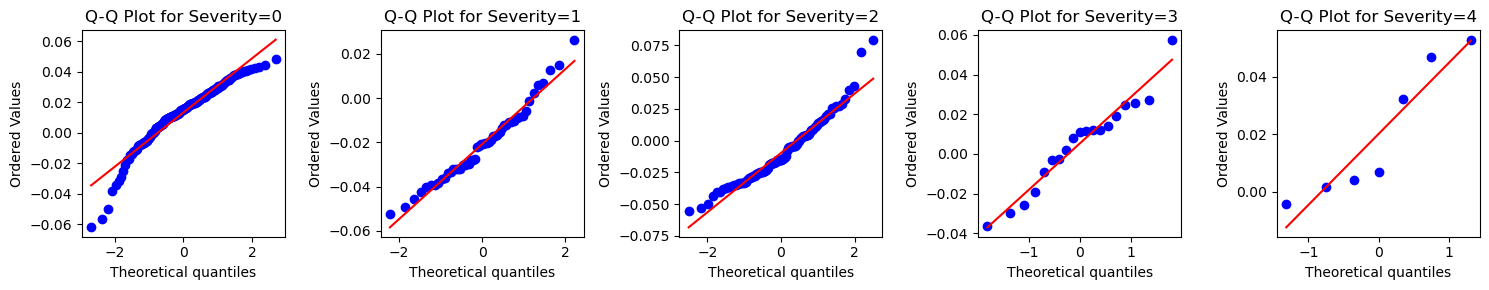

In [77]:
fig, ax = plt.subplots(1,5, figsize=(15,3))
stats.probplot(df_cls0['scores'], dist="norm", plot=ax[0])
ax[0].set_title(f"Q-Q Plot for Severity=0")
stats.probplot(df_cls1['scores'], dist="norm", plot=ax[1])
ax[1].set_title(f"Q-Q Plot for Severity=1")
stats.probplot(df_cls2['scores'], dist="norm", plot=ax[2])
ax[2].set_title(f"Q-Q Plot for Severity=2")
stats.probplot(df_cls3['scores'], dist="norm", plot=ax[3])
ax[3].set_title(f"Q-Q Plot for Severity=3")
stats.probplot(df_cls4['scores'], dist="norm", plot=ax[4])
ax[4].set_title(f"Q-Q Plot for Severity=4")
plt.tight_layout()
plt.show()

- Influnece scores are not normally distributed, so we use the following non-parametric test which is called: 

- We test for tihs:

  - Null Hypothesis (H₀): There is no significant difference in influence scores between the severity levels.
  - Alternative Hypothesis (H₁): There is a significant difference in influence scores between at least two severity levels.
  
  - Significant Differences: If the p-value from your statistical test (e.g., Kruskal-Wallis, ANOVA) is less than 0.05 (usually the threshold for significance), this means there is evidence to reject the null hypothesis. In other words, the influence scores are significantly different between the severity levels.

- (a) For Comparing Multiple Groups:

  - **Kruskal-Wallis Test**: If the influence scores are not normally distributed.
     - Suitable for comparing multiple groups (severity levels).

- Here I compare influnece scores of all severity levels.

- Then I compare influnece scores of severity levels in unhelealthy group.

- For **Kruskal-Wallis Test** we have the following null and alternative hypothesis:

  - Null Hypothesis (H₀): The distributions of influence scores across all groups (severity levels) are the same.
  - Alternative Hypothesis (H₁): At least one group differs in distribution

#### Looking at statistically difference accross all groups 

In [86]:
from scipy.stats import kruskal


# Perform Kruskal-Wallis test
stat, p = kruskal(df_cls0['scores'], df_cls1['scores'], df_cls2['scores'], df_cls3['scores'], df_cls4['scores'])
print(f"Kruskal-Wallis test statistic: {stat}, p-value: {p}")

Kruskal-Wallis test statistic: 129.50211792534697, p-value: 4.9759401368569446e-27


- Based on p-value we reject the null hypothesis, which means there is **statistically significance** difference between influnce scores accross different groups. 

- Now we perform post-hoc evaluation to see which groups are statistically different? 

In [90]:
df

ids    scores  labels   gr
3    377  0.052780       4  unh
5    382  0.046855       4  unh
31   383  0.032151       4  unh
179  379  0.006959       4  unh
195  380  0.004223       4  unh
209  381  0.001763       4  unh
233  378 -0.004438       4  unh

In [92]:
df_cls0[['scores', 'labels']]

scores  labels
4    0.048426       0
6    0.044601       0
7    0.042762       0
9    0.042234       0
10   0.041434       0
..        ...     ...
355 -0.034271       0
367 -0.038517       0
378 -0.050067       0
382 -0.056457       0
383 -0.062187       0

[192 rows x 2 columns]

In [94]:
data = pd.concat([df_cls0[['scores', 'labels']], df_cls1[['scores', 'labels']], df_cls2[['scores', 'labels']], df_cls3[['scores', 'labels']],df_cls4[['scores', 'labels']]], axis=0, ignore_index=True)

In [96]:
import scikit_posthocs as sp
import seaborn as sns

# Perform Dunn's test
dunn_results = sp.posthoc_dunn(data, val_col='scores', group_col='labels', p_adjust='bonferroni')
print(dunn_results)

              0             1             2         3         4
0  1.000000e+00  1.467121e-19  3.757655e-17  0.947817  1.000000
1  1.467121e-19  1.000000e+00  1.087938e-01  0.000879  0.001085
2  3.757655e-17  1.087938e-01  1.000000e+00  0.116344  0.036413
3  9.478166e-01  8.786271e-04  1.163443e-01  1.000000  1.000000
4  1.000000e+00  1.084957e-03  3.641321e-02  1.000000  1.000000


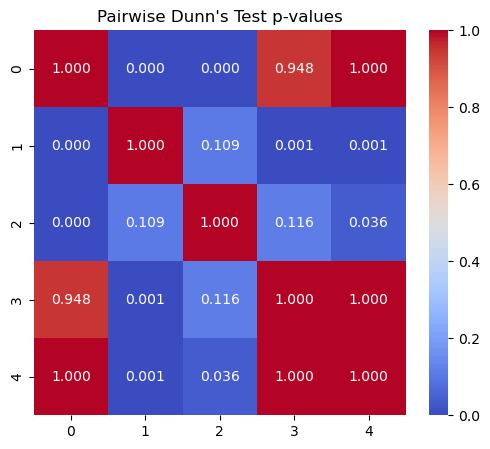

In [98]:
# Visualization 2: Heatmap of Pairwise p-values
plt.figure(figsize=(6, 5))
sns.heatmap(dunn_results, annot=True, cmap="coolwarm", cbar=True, fmt=".3f")
plt.title("Pairwise Dunn's Test p-values")
plt.show()

- Key points to consider:
  - Significance Threshold: Typically, p-values below 0.05 (or your chosen alpha level) indicate significant differences between groups.
  
  - Bonferroni Adjustment: Since you applied this correction, your test is more conservative, reducing the chance of false positives.

- There are some **nice** results here, **class 0** and **class 4** are not statistically different that is confirmed by **box plot**.

- **class4** is statistically signficant from **class1** and **class2**.

- **class4** is not statistically different from **class3**. 

- **class3** is not significantly different from **class0** and **class4** and **class2**.

3. Insights
  
  - Identify which severity levels differ significantly in terms of influence scores.
  
  - Relate these differences to your hypothesis. For example:
  
  - Do more severe cases consistently show higher (or lower) influence scores compared to milder cases?
  
  - Are there surprising non-significant results?

### Considering only unhealthy groups

In [99]:
data_unh = pd.concat([ df_cls1[['scores', 'labels']], df_cls2[['scores', 'labels']], df_cls3[['scores', 'labels']],df_cls4[['scores', 'labels']]], axis=0, ignore_index=True)

In [100]:
import scikit_posthocs as sp
import seaborn as sns

# Perform Dunn's test
dunn_results_unh = sp.posthoc_dunn(data_unh, val_col='scores', group_col='labels', p_adjust='bonferroni')
print(dunn_results_unh)

          1         2         3         4
1  1.000000  0.028632  0.000158  0.000570
2  0.028632  1.000000  0.049485  0.028585
3  0.000158  0.049485  1.000000  1.000000
4  0.000570  0.028585  1.000000  1.000000


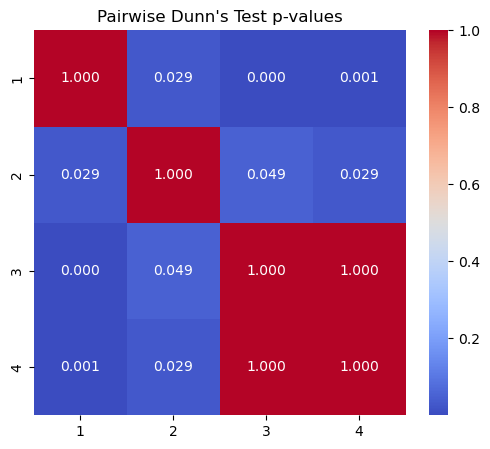

In [101]:
# Visualization 2: Heatmap of Pairwise p-values for unhealthy group
plt.figure(figsize=(6, 5))
sns.heatmap(dunn_results_unh, annot=True, cmap="coolwarm", cbar=True, fmt=".3f")
plt.title("Pairwise Dunn's Test p-values")
plt.show()

## Looking at outlires in each group

- Looking at outliers in each severity level.

- For example in healthy group.
 

In [2]:
from pathlib import Path

In [3]:
path_inf_score = Path('./infscores/42_2_simclr_400')

csv_file = path_inf_score / "df_rank_label.csv"

In [27]:
df_rank = pd.read_csv(csv_file)

In [28]:
df_rank

ids    scores  labels   gr
0    249  0.079484       2  unh
1    231  0.069545       2  unh
2    371  0.057572       3  unh
3    377  0.052780       4  unh
4     64  0.048426       0    h
..   ...       ...     ...  ...
379  356 -0.052484       1  unh
380  197 -0.053322       2  unh
381  233 -0.055105       2  unh
382  108 -0.056457       0    h
383  129 -0.062187       0    h

[384 rows x 4 columns]

In [31]:
df_cls0 = df_rank[df_rank['labels']==0]

In [34]:
df_cls0['scores']

4      0.048426
6      0.044601
7      0.042762
9      0.042234
10     0.041434
         ...   
355   -0.034271
367   -0.038517
378   -0.050067
382   -0.056457
383   -0.062187
Name: scores, Length: 192, dtype: float64

In [33]:
# Filter influence scores for group 0
group_0_scores = df_cls0['scores']

# Compute Q1 and Q3
Q1 = np.percentile(group_0_scores, 25)
Q3 = np.percentile(group_0_scores, 75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = group_0_scores[(group_0_scores < lower_bound) | (group_0_scores > upper_bound)]

# Get indices of outliers
#outlier_indices = np.where((influence_scores < lower_bound) | (influence_scores > upper_bound) & (group_labels == 0))[0]

# Display results
print(f"Outliers in Group 0: {outliers}")
#print(f"Outlier Indices in Group 0: {outlier_indices}")

Outliers in Group 0: 319   -0.025411
332   -0.029063
341   -0.031765
355   -0.034271
367   -0.038517
378   -0.050067
382   -0.056457
383   -0.062187
Name: scores, dtype: float64


- 8 samples from group 0 are known as **outliers** 

In [40]:
outlier_indices = outliers.index

In [41]:
print(outlier_indices)

Index([319, 332, 341, 355, 367, 378, 382, 383], dtype='int64')


In [46]:
outliers.values

array([-0.02541127, -0.02906321, -0.03176498, -0.03427079, -0.0385165 ,
       -0.05006671, -0.05645672, -0.0621869 ])

In [48]:
df_out_0 = pd.DataFrame({'indices':outlier_indices, 'scores':outliers.values})

In [49]:
df_out_0.set_index('indices', inplace=True)

In [50]:
common_indices = df_rank.index.intersection(df_out_0.index)

In [51]:
result_ids = df_rank.loc[common_indices, 'ids']

In [52]:
result_ids

319     60
332    151
341     63
355     30
367    179
378    132
382    108
383    129
Name: ids, dtype: int64

In [58]:
result_ids.values

array([ 60, 151,  63,  30, 179, 132, 108, 129])

In [56]:
h_img.shape

(192, 3, 224, 224)

In [57]:
unh_img.shape

(192, 3, 224, 224)

In [59]:
img0_out = []

for ids in result_ids.values:
    
    img0_out.append(channel_last(h_img[ids]))

In [60]:
print(len(img0_out))

8


In [71]:
outlier_scores_0 = outliers.values

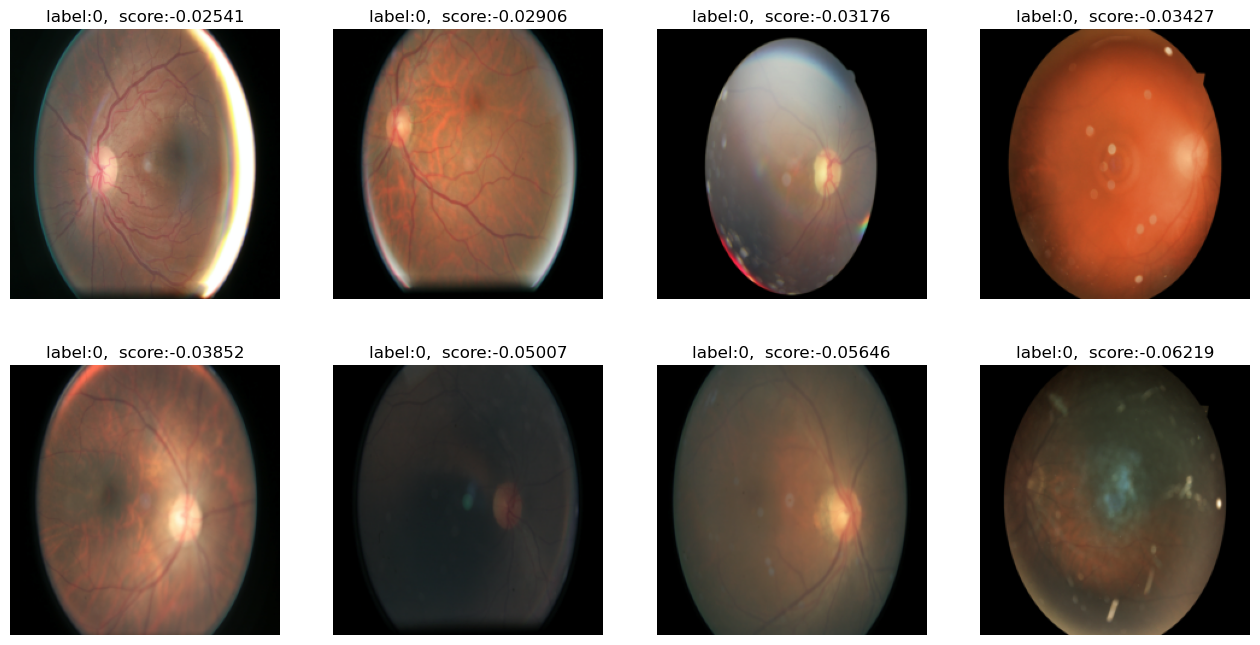

In [77]:
fig,ax = plt.subplots(2,4,figsize=(16,8))

for i in range(0,2):
    for j in range(0,4):
        
        k = i*4+j
        
        ax[i,j].imshow(img0_out[k])
        
        ax[i,j].set_title(f'label:{0},  score:{outlier_scores_0[k]:0.5f}')
        ax[i,j].axis('off')

- **Question**: If they exhibit peculiar characteristics (e.g., artifacts, ambiguous features).

- **Examine the clinical or structural features** in these outliers. For instance, are the outliers in Class 0 associated with features like slight hemorrhages or noise that could mimic unhealthy retinas?

- **Outliers in class2**:

In [79]:
df_cls2 = df_rank[df_rank['labels']==2]

In [81]:
# Filter influence scores for group 2
group_2_scores = df_cls2['scores']

# Compute Q1 and Q3
Q1 = np.percentile(group_2_scores, 25)
Q3 = np.percentile(group_2_scores, 75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = group_2_scores[(group_2_scores < lower_bound) | (group_2_scores > upper_bound)]

# Get indices of outliers
#outlier_indices = np.where((influence_scores < lower_bound) | (influence_scores > upper_bound) & (group_labels == 0))[0]

# Display results
print(f"Outliers in Group 2: {outliers}")
#print(f"Outlier Indices in Group 0: {outlier_indices}")

Outliers in Group 2: 0    0.079484
1    0.069545
Name: scores, dtype: float64


In [82]:
outloers_in_gr2 = [249,231]

In [84]:
total_img = np.concatenate([h_img, unh_img])

In [87]:
imh2_249 = channel_last(total_img[249])
imh2_231 = channel_last(total_img[231])

Text(0.5, 1.0, 'label:2, score:0.069545')

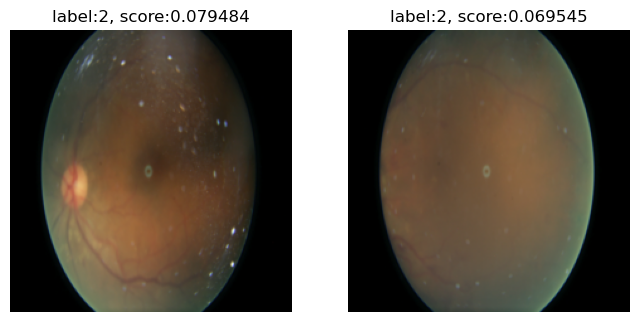

In [92]:
fig, axes = plt.subplots(1,2,figsize=(8,4))

axes[0].imshow(imh2_249)
axes[0].axis('off')
axes[0].set_title(f'label:2, score:0.079484')

axes[1].imshow(imh2_231)
axes[1].axis('off')
axes[1].set_title(f'label:2, score:0.069545')

- Do the outliers share similar visual or structural patterns.

In [93]:
df_cls1 = df_rank[df_rank['labels']==1]

In [94]:
# Filter influence scores for group 1
group_1_scores = df_cls1['scores']

# Compute Q1 and Q3
Q1 = np.percentile(group_1_scores, 25)
Q3 = np.percentile(group_1_scores, 75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = group_1_scores[(group_1_scores < lower_bound) | (group_1_scores > upper_bound)]

# Get indices of outliers
#outlier_indices = np.where((influence_scores < lower_bound) | (influence_scores > upper_bound) & (group_labels == 0))[0]

# Display results
print(f"Outliers in Group 1: {outliers}")
#print(f"Outlier Indices in Group 0: {outlier_indices}")

Outliers in Group 1: 55    0.026357
Name: scores, dtype: float64


In [95]:
df_rank.iloc[55]

ids            308
scores    0.026357
labels           1
gr             unh
Name: 55, dtype: object

Text(0.5, 1.0, 'label:1, score: 0.026357')

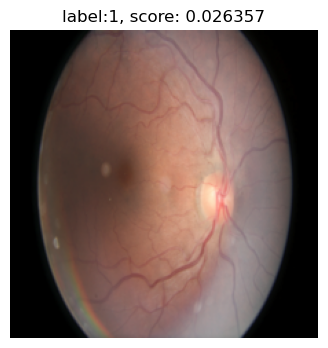

In [103]:
plt.figure(figsize=(4,4))

plt.imshow(channel_last(total_img[308]))

plt.axis('off')

plt.title(f'label:1, score: 0.026357')

In [104]:
df_cls3 = df_rank[df_rank['labels']==3]

In [106]:
# outlier of group 3

# Filter influence scores for group 1
group_3_scores = df_cls3['scores']

# Compute Q1 and Q3
Q1 = np.percentile(group_3_scores, 25)
Q3 = np.percentile(group_3_scores, 75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = group_3_scores[(group_3_scores < lower_bound) | (group_3_scores > upper_bound)]

# Get indices of outliers
#outlier_indices = np.where((influence_scores < lower_bound) | (influence_scores > upper_bound) & (group_labels == 0))[0]

# Display results
print(f"Outliers in Group 3: {outliers}")
#print(f"Outlier Indices in Group 0: {outlier_indices}")

Outliers in Group 3: 2    0.057572
Name: scores, dtype: float64


- id corresponding to it is: 371

In [107]:
df_rank.iloc[2]

ids            371
scores    0.057572
labels           3
gr             unh
Name: 2, dtype: object

Text(0.5, 1.0, 'label:3, score: 0.057572')

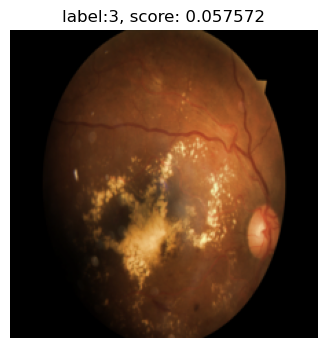

In [108]:
plt.figure(figsize=(4,4))

plt.imshow(channel_last(total_img[371]))

plt.axis('off')

plt.title(f'label:3, score: 0.057572')

- One observation is that from outliers those samples the have highest influence scores, seem worse compared to those ones that have lower influnce scores.

#### Computing p-value by removing outliers

- To compute p-value, first we need to upload embeddings for both groups

- Then remove the indices related to outliers from embedding space

- Recompute p-value 


In [3]:
outlier_in_cls0 = [319,332,341,355,367,378,382,383]

scores_outliers_cls0 = [-0.025411,-0.029063,-0.031765,-0.034271,-0.038517,-0.050067,-0.056457,-0.062187]

outlier_in_cls1= [308]

scores_outlier_cls1= [0.026357]

outloers_in_cls2 = [249,231]

scores_outlier_cls2= [0.079484,0.069545]

outlier_in_cls3 = [371]

scores_outlier_cls3 = [0.057572]


- We are sure that if we remove outliers with negative scores, p-value decreases and if we remove outliers with positive scores, p-value increases. 

In [18]:
a = np.random.rand(2,3)

b = np.random.rand(2,3)

c = np.vstack((a,b))

c.shape

(4, 3)

### looking at heatmpa of outliers:

In [117]:
root_dir = './'

img_dir = os.path.join(root_dir, 'overlays', '42_11_simclr_7.2.conv1')

unh_ov = os.path.join(img_dir, 'unhealthy_True_overlays')

In [119]:
unh_ov_list = os.listdir(unh_ov)

In [120]:
print(len(unh_ov_list))

192


In [128]:
print(unh_ov_list[:10])

['overlay_18.png', 'overlay_178.png', 'overlay_64.png', 'overlay_104.png', 'overlay_63.png', 'overlay_103.png', 'overlay_3.png', 'overlay_11.png', 'overlay_171.png', 'overlay_16.png']


In [126]:
print(img179_unh)

overlay_147.png


In [132]:
img179_unh_path = os.path.join(unh_ov,'overlay_179.png')

In [133]:
from PIL import Image

In [134]:
img_179 = Image.open(img179_unh_path)

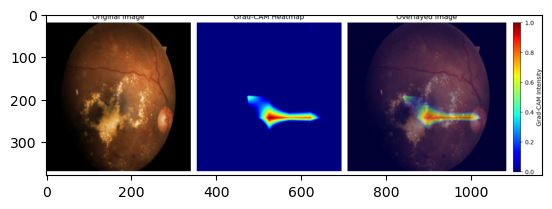

In [135]:
plt.imshow(img_179)

In [136]:
308-192

116

In [141]:
img116_h_path = os.path.join(unh_ov,'overlay_116.png')

In [142]:
img_116 = Image.open(img116_h_path)

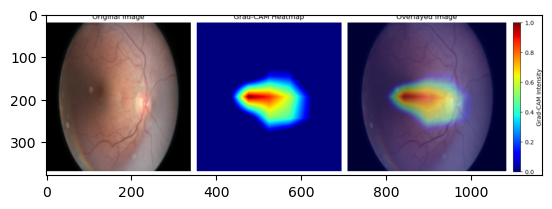

In [143]:
plt.imshow(img_116)

In [144]:
249-192

57

In [145]:
231-192

39

In [146]:
img57_unh_path = os.path.join(unh_ov,'overlay_57.png')

img39_unh_path = os.path.join(unh_ov,'overlay_39.png')

In [148]:
img57 = Image.open(img57_unh_path)

img39 = Image.open(img39_unh_path)

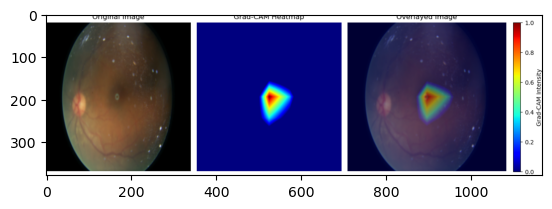

In [149]:
plt.imshow(img57)

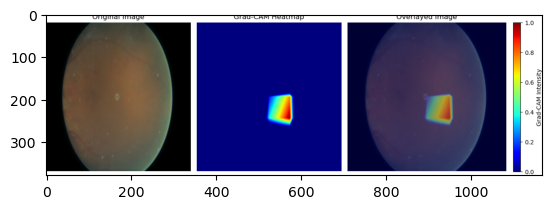

In [150]:
plt.imshow(img39)

### Looking at cdf of influence scores for each group

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pwd

'/dhc/home/masoumeh.javanbakhat/netstore-old/Baysian/3D/Explainability/Retina_Codes/notebooks'

In [12]:
cd ..


/dhc/home/masoumeh.javanbakhat/netstore-old/Baysian/3D/Explainability/Retina_Codes


In [15]:
path_inf_score = Path('./infscores/42_2_simclr_400')

In [17]:
path_inf_score = Path('./infscores/42_2_simclr_400')

csv_file = path_inf_score / "df_rank_label.csv"

df_rank = pd.read_csv(csv_file)

In [20]:
df = df_rank.copy()

In [26]:
df_cls0 = df[df['labels']==0]

df_cls1 = df[df['labels']==1]

df_cls2 = df[df['labels']==2]

df_cls3= df[df['labels']==3]

df_cls4 = df[df['labels']==4]

In [27]:
def cdf_inf_score(df):
    
    # Sort values
    sorted_scores = np.sort(df['scores'])
    
    # Compute cdf values
    cdf = np.arange(1,len(sorted_scores)+1) /len(sorted_scores)
    
    return cdf, sorted_scores
    

In [28]:
cdf_cls0, sort_cls0 = cdf_inf_score(df_cls0)
cdf_cls1, sort_cls1 = cdf_inf_score(df_cls1)

cdf_cls2, sort_cls2 = cdf_inf_score(df_cls2)

cdf_cls3, sort_cls3 = cdf_inf_score(df_cls3)

cdf_cls4, sort_cls4 = cdf_inf_score(df_cls4)

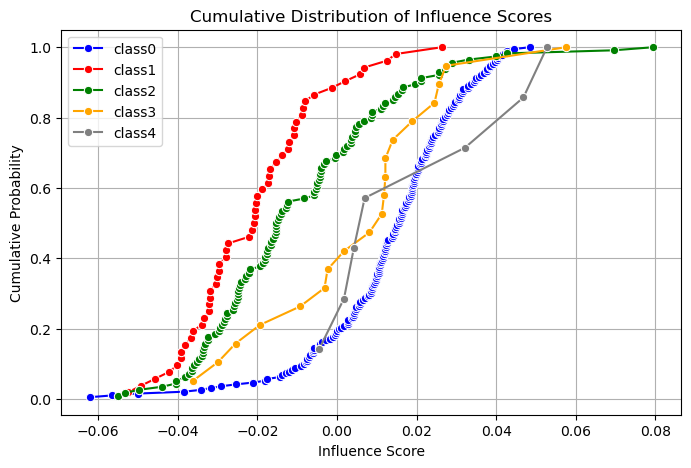

In [34]:
# Plot CDF
plt.figure(figsize=(8, 5))
sns.lineplot(x=sort_cls0, y=cdf_cls0, marker="o", linestyle="-", color="blue", label='class0 (healthy)')
sns.lineplot(x=sort_cls1, y=cdf_cls1, marker="o", linestyle="-", color="red", label='class1')
sns.lineplot(x=sort_cls2, y=cdf_cls2, marker="o", linestyle="-", color="green",label='class2')
sns.lineplot(x=sort_cls3, y=cdf_cls3, marker="o", linestyle="-", color="orange",label='class3')
sns.lineplot(x=sort_cls4, y=cdf_cls4, marker="o", linestyle="-", color="gray",label='class4')
plt.xlabel("Influence Score")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution of Influence Scores")
plt.grid(True)

plt.show()

- How shold we interpret the above plot?

#### looking at p-value when outliers are removed:

 - **Purpose of This Analysis**:
   - **Hypothesis Testing**: Determine whether outliers are disproportionately influencing the observed statistical significance.
   - **Data Quality Assessment**: Understand if these outliers represent noise, rare pathological cases, or meaningful deviations in the data.
   - **Model Reliability**: Ensure that your findings are robust and not overly dependent on a few influential samples.
   
 - **Example Outcome**:
   - If removing outliers results in:

    - A significant increase in p-value, it suggests that outliers heavily contribute to the observed group differences.
    - A minimal change in p-value, it indicates that the statistical relationship between the groups is robust, even without the outliers.

- My assumption is that when we remove the outliers from group 1, they should contribute to the group similarities. These are indeed samples have pattrerns that make them similar to unhealthy group.